In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loan_ID : Unique Loan ID

Gender : Male/ Female

Married : Applicant married (Y/N)

Dependents : Number of dependents

Education : Applicant Education (Graduate/ Under Graduate)

Self_Employed : Self employed (Y/N)

ApplicantIncome : Applicant income

CoapplicantIncome : Coapplicant income

LoanAmount : Loan amount in thousands of dollars

Loan_Amount_Term : Term of loan in months

Credit_History : Credit history meets guidelines yes or no

Property_Area : Urban/ Semi Urban/ Rural

 Loan_Status : Loan approved (Y/N) this is the target variable

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_data= pd.read_csv('/content/drive/MyDrive/train.csv')

### 1. Display Top 5 Rows of The Dataset

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 2. Check Last 5 Rows of The Dataset

In [5]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [6]:
train_data.shape

(614, 13)

### 4. Map Loan_status Y,N to 1,0

In [7]:
train_data.Loan_Status=train_data.Loan_Status.map({'Y':1,'N':0})

In [8]:
train_data.Loan_Status.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


### 5. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


### 6. Check Null Values In The Dataset

In [10]:
train_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


### 7.uploading test data set

In [11]:
test_data=pd.read_csv('/content/drive/MyDrive/test.csv')

In [12]:
Loan_ID=test_data.Loan_ID

### 8.Concat both the data_set

In [13]:
data=pd.concat([train_data,test_data],axis=0)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1.0


In [14]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,981.000000,981.000000,954.000000,961.000000,902.000000,614.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920,0.687296
std,5695.104533,2718.772806,77.421743,65.100602,0.370553,0.463973
min,0.000000,0.000000,9.000000,6.000000,0.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [15]:
data.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,3
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 107.3+ KB


In [17]:
data.Gender.dtypes

dtype('O')

### 9. corr():-used to create a correlation matrix heatmap. This type of visualization is helpful for understanding the relationships between numerical variables in a dataset.

In [18]:
Numeric_data=data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

<Axes: >

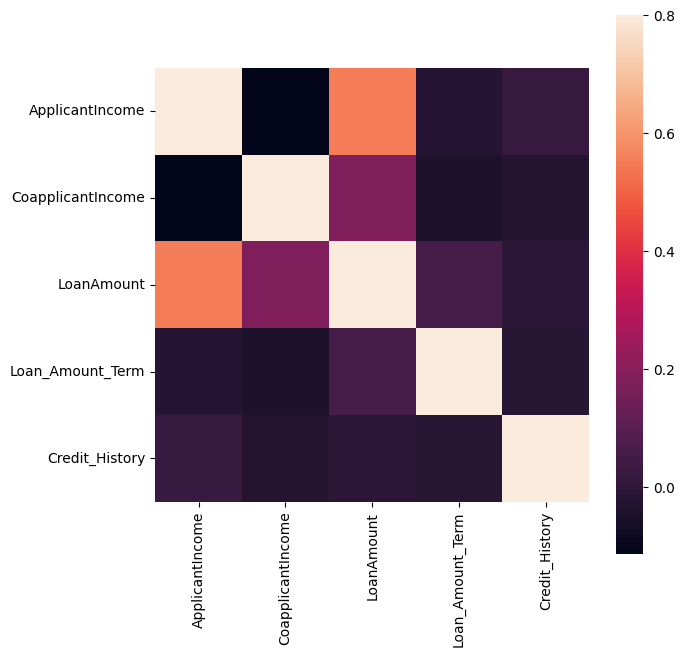

In [19]:
#The resulting corrmat is a square matrix where each element represents the correlation between two variables.
corrmat = Numeric_data.corr()

#plt.subplots(figsize=(7, 7)) creates a figure f and a set of subplots ax with a figure size of 7 by 7 inches.This prepares a canvas for the heatmap.
f, ax = plt.subplots(figsize=(7, 7))


# sns.heatmap() is used to draw the heatmap.
# corrmat is the correlation matrix to be visualized.
# vmax=.8 sets the maximum value of the heatmap’s color scale. This can help to visualize variations if correlations are strong.
# square=True makes each cell of the heatmap square-shaped, which gives a neat appearance to the heatmap.
sns.heatmap(corrmat, vmax=.8, square=True)

###10. Converting categorical data into numeric data

In [20]:
data.Gender=data.Gender.map({'Male':1,'Female':0})

In [21]:
data.Gender.value_counts()

,count
Gender,
1.0,775
0.0,182


In [22]:
data.Married=data.Married.map({'Yes':1,'No':0})

In [23]:
data.Married.value_counts()

,count
Married,
1.0,631
0.0,347


In [24]:
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [25]:
data.Dependents.value_counts()

,count
Dependents,
0.0,545
1.0,160
2.0,160
3.0,91


In [26]:
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [27]:
data.Education.value_counts()

,count
Education,
1,763
0,218


In [28]:
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

In [29]:
data.Self_Employed.value_counts()

,count
Self_Employed,
0.0,807
1.0,119


In [30]:
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [31]:
data.Property_Area.value_counts()

,count
Property_Area,
1,349
2,342
0,290


In [32]:
Corr_data1=data[['Married','Gender','ApplicantIncome','Dependents','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Self_Employed','Education']]

<Axes: >

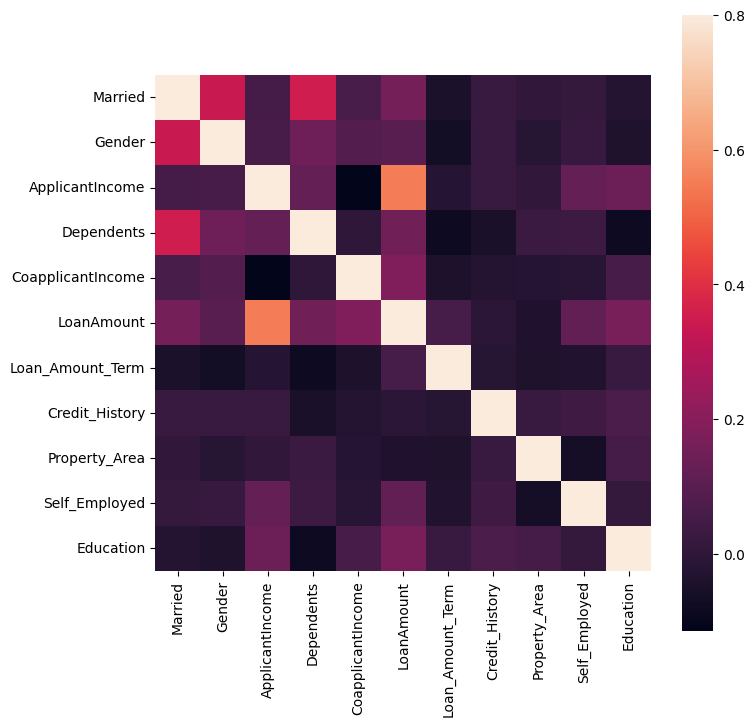

In [33]:
#The resulting corrmat is a square matrix where each element represents the correlation between two variables.
corrmat = Corr_data1.corr()

#plt.subplots(figsize=(7, 7)) creates a figure f and a set of subplots ax with a figure size of 7 by 7 inches.This prepares a canvas for the heatmap.
f, ax = plt.subplots(figsize=(8, 8))


# sns.heatmap() is used to draw the heatmap.
# corrmat is the correlation matrix to be visualized.
# vmax=.8 sets the maximum value of the heatmap’s color scale. This can help to visualize variations if correlations are strong.
# square=True makes each cell of the heatmap square-shaped, which gives a neat appearance to the heatmap.
sns.heatmap(corrmat, vmax=.8, square=True)

### 11.Filling NAN Values

In [34]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [35]:
data.Married.fillna(np.random.randint(0,2),inplace=True)

In [36]:
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

In [37]:
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [38]:
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [39]:
data.Dependents.fillna(data.Dependents.median(),inplace=True)

In [40]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [41]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [42]:
Corr_data1=data[['Married','Gender','ApplicantIncome','Dependents','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Self_Employed','Education']]

<Axes: >

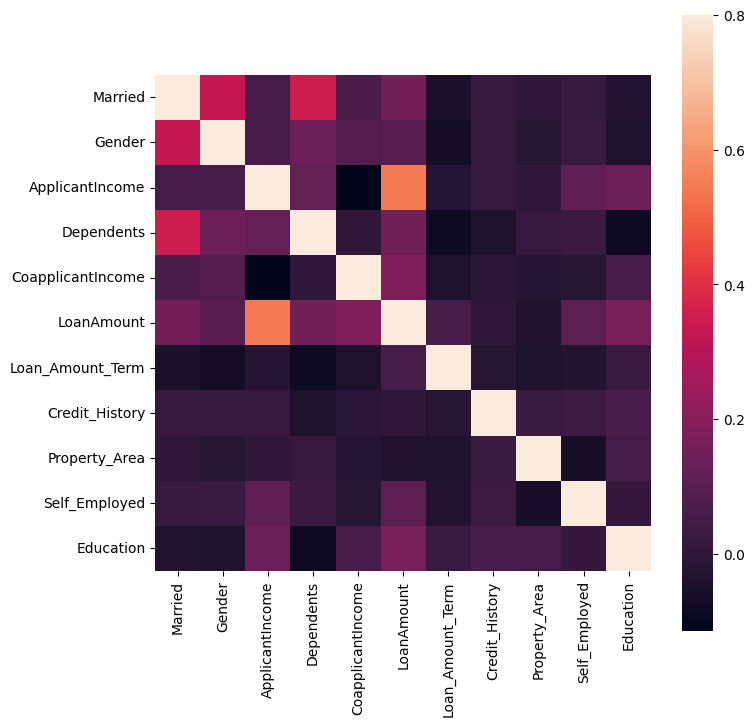

In [43]:
corrmat=Corr_data1.corr()
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(corrmat,vmax=.8,square=True)

In [44]:
data.drop('Loan_ID',inplace=True,axis=1)

In [45]:
train_X=data.iloc[:614,]

In [46]:
train_y = data['Loan_Status'].iloc[:614,]

### 12. Importing Files For Machine Learning Model

In [47]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=0)

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### 13. model selection

In [49]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [51]:
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring='accuracy')
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression()
Logistic Regression 0.993478
DecisionTreeClassifier()
Decision Tree 1.000000
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.802174
RandomForestClassifier()
Random Forest 1.000000
SVC()
Support Vector Classifier 0.673913
KNeighborsClassifier()
K- Neirest Neighbour 0.647826
GaussianNB()
Naive Bayes 0.995652


### 14.splitting data into test and train

In [52]:
test_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
454,1.0,0.0,0.0,1,1.0,7085,0.0,84.0,360.0,1.0,1,1.0
52,0.0,0.0,0.0,1,0.0,4230,0.0,112.0,360.0,1.0,1,0.0
536,1.0,1.0,0.0,1,0.0,6133,3906.0,324.0,360.0,1.0,2,1.0
469,1.0,1.0,0.0,1,0.0,4333,2451.0,110.0,360.0,1.0,2,0.0
55,1.0,1.0,2.0,1,0.0,2708,1167.0,97.0,360.0,1.0,1,1.0


In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR=LogisticRegression()
LR.fit(train_X,train_y)
pred=LR.predict(test_X)
print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Model Accuracy:-  0.9935064935064936
[[ 42   1]
 [  0 111]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        43
         1.0       0.99      1.00      1.00       111

    accuracy                           0.99       154
   macro avg       1.00      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
X_test=data.iloc[614:,]

In [55]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with a strategy, e.g., mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
train_X = imputer.fit_transform(train_X)
X_test = imputer.transform(X_test)


In [56]:
prediction = LR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [57]:
t = LR.predict([[0, 0, 0, 1, 0, 1811, 1666, 54, 360, 1, 2, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [58]:
print(t)

[1.]


In [59]:
filename="model1.pkl"

In [60]:
import pickle
with open(filename, 'wb') as f:
    pickle.dump(LR, f)

In [61]:
with open(filename, 'rb') as f:
    m = pickle.load(f)

In [62]:
cy = m.predict([[0,0,0,1,0,4230,0,112,360,1,1,1]])
print(cy)

[1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### 15 Deploying Project by creating streamlit app

In [63]:
!pip install streamlit -q

In [64]:
!pip install pyngrok


In [65]:
from pyngrok import ngrok

In [66]:
code = """
import streamlit as st
from PIL import Image
import pickle

model = pickle.load(open('model1.pkl', 'rb'))

def run():
    img1 = Image.open('/content/drive/MyDrive/Loan Prediction Webpage/bank form image.png')
    img1 = img1.resize((180, 180))
    st.image(img1, use_column_width=False)

    new_title = '<p style="font-family:sans-serif; color:Orange; font-size: 20px;">State Bank Of India</p>'
    st.markdown(new_title, unsafe_allow_html=True)
    title = '<p style="font-family:sans-serif; color:orange; font-size: 30px;">Bank_Loan_Prediction</p>'

    st.markdown(title, unsafe_allow_html=True)

    fn = st.text_input('Full Name')
    account_no = st.text_input('Account number')

    gen_display = ('Female','Male')
    gen_options = list(range(len(gen_display)))
    gen = st.selectbox("Gender", gen_options, format_func=lambda x: gen_display[x])

    edu_display = ('Not Graduate', 'Graduate')
    edu_options = list(range(len(edu_display)))
    edu = st.selectbox("Education", edu_options, format_func=lambda x: edu_display[x])

    mar_display = ('No', 'Yes')
    mar_options = list(range(len(mar_display)))
    mar = st.selectbox("Marital Status", mar_options, format_func=lambda x: mar_display[x])

    dep_display = ('No', 'One', 'Two', 'More than Two')
    dep_options = list(range(len(dep_display)))
    dep = st.selectbox("Dependents", dep_options, format_func=lambda x: dep_display[x])

    emp_display = ('Job', 'Business')
    emp_options = list(range(len(emp_display)))
    emp = st.selectbox("Employment Status", emp_options, format_func=lambda x: emp_display[x])

    prop_display = ('Rural', 'Semi-Urban', 'Urban')
    prop_options = list(range(len(prop_display)))
    prop = st.selectbox("Property Area", prop_options, format_func=lambda x: prop_display[x])

    cred_display = ('Between 300 to 500', 'Above 500')
    cred_options = list(range(len(cred_display)))
    cred = st.selectbox("Credit Score", cred_options, format_func=lambda x: cred_display[x])

    mon_income = st.number_input("Applicant's Monthly Income($)", value=0)

    co_mon_income = st.number_input("Co-Applicant's Monthly Income($)", value=0)

    loan_amt = st.number_input("Loan Amount", value=0)

    dur_display = ['2 Month', '6 Month', '8 Month', '1 Year', '16 Month']
    dur_options = range(len(dur_display))
    dur = st.selectbox("Loan Duration", dur_options, format_func=lambda x: dur_display[x])

    # Adding a new feature to match the model's expected input
    credit_history = st.selectbox("Credit History", [0, 1])

    if st.button("Submit"):
        duration = 0
        if dur == 0:
            duration = 60
        if dur == 1:
            duration = 180
        if dur == 2:
            duration = 240
        if dur == 3:
            duration = 360
        if dur == 4:
            duration = 480

        # Updated features to match the model's expected input
        features = [[gen, mar, dep, edu, emp, mon_income, co_mon_income, loan_amt, duration, cred, prop, credit_history]]
        print(features)
        prediction = model.predict(features)
        # Directly get the prediction result as an integer
        ans = int(prediction[0])  # Assuming the model's prediction is a list like [0] or [1]
        if ans == 0:
            st.error(
                "Hello " + fn +' you will not get a loan as per the calculations of the bank.'
            )
        else:
            st.success(
                "Hello " + fn + ' '+' Congratulations!! you will get the loan from Bank'
            )

run()

"""

# Save the code to a file
with open('streamlit_app.py', 'w') as file:
    file.write(code)


In [67]:
!npm install -g localtunnel



changed 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [68]:
!streamlit run /content/streamlit_app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.61.87:8501

your url is: https://modern-berries-watch.loca.lt
[[0, 0, 0, 0, 0, 0, 10000, 9999997, 60, 0, 0, 0]]
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
  Stopping...
^C
